# Install libs

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 99.2 MB/s eta 0:00:00


# Create mapping between country names and filenames

### Nationality to country name map

In [ ]:
european_countries = {
    'Albanian': 'Albania',
    'Andorran': 'Andorra',
    'Armenian': 'Armenia',
    'Austrian': 'Austria',
    'Azerbaijani': 'Azerbaijan',
    'Belarusian': 'Belarus',
    'Belgian': 'Belgium',
    'Bosnian': 'Bosnia and Herzegovina',
    'Bulgarian': 'Bulgaria',
    'Croatian': 'Croatia',
    'Cypriot': 'Cyprus',
    'Czech': 'Czech Republic',
    'Danish': 'Denmark',
    'Estonian': 'Estonia',
    'Finnish': 'Finland',
    'French': 'France',
    'Georgian': 'Georgia',
    'German': 'Germany',
    'Greek': 'Greece',
    'Hungarian': 'Hungary',
    'Icelandic': 'Iceland',
    'Irish': 'Ireland',
    'Italian': 'Italy',
    'Kazakhstani': 'Kazakhstan',
    'Kosovan': 'Kosovo',
    'Latvian': 'Latvia',
    'Liechtensteiner': 'Liechtenstein',
    'Lithuanian': 'Lithuania',
    'Luxembourger': 'Luxembourg',
    'Luxembourgish': 'Luxembourg',
    'Macedonian': 'North Macedonia',
    'Maltese': 'Malta',
    'Moldovan': 'Moldova',
    'Monégasque': 'Monaco',
    'Montenegrin': 'Montenegro',
    'Dutch': 'Netherlands',
    'Norwegian': 'Norway',
    'Polish': 'Poland',
    'Portuguese': 'Portugal',
    'Romanian': 'Romania',
    'Russian': 'Russia',
    'San Marinese': 'San Marino',
    'Serbian': 'Serbia',
    'Slovak': 'Slovakia',
    'Slovenian': 'Slovenia',
    'Spanish': 'Spain',
    'Swedish': 'Sweden',
    'Swiss': 'Switzerland',
    'Ukrainian': 'Ukraine',
    'British': 'United Kingdom',
    'Vatican': 'Vatican City'
}


### Map country names to filenames

In [ ]:
!ls "/content/drive/MyDrive/AI/deliberate_model/"

 castles_of_europe			       europe_face_pictures_backup
 eu_industrial_revolution_paintings	       europe_women_selfies_1
 eu_national_aerial_view_prompts	       filename_to_prompt.json
 eu_national_architectural_prompts	       gpt4-batch2
 eu_national_baroque_still_life_prompts        gpt4-batch3
 eu_national_environmental_efforts_prompts     gpt4-batch4
 eu_national_impressionist_garden_prompts      gpt4-batch5
 eu_national_leaders_prompts		       gpt4-batch6
 eu_national_mosaic_prompts		       gpt4-todo2and3
 eu_national_mountain_prompts		       houses_batch_1
 eu_national_renaissance_castle_prompts        images
 eu_national_satellite_view_prompts	       prev_dishes
 eu_national_scientific_contribution_prompts  'previous images'
 eu_national_travel_poster_prompts	      'prompt lists'
 eu_national_vintage_poster_prompts	       prompt_to_filename_df.csv
 europe_face_pictures


In [ ]:
remaining_prompt_dirs = [
    'eu_national_vintage_poster_prompts',
    'eu_national_renaissance_castle_prompts',
    'eu_national_mosaic_prompts',
    'eu_national_mountain_prompts',
    'eu_national_travel_poster_prompts',
    'eu_national_leaders_prompts',
    'eu_national_baroque_still_life_prompts',
    'eu_national_impressionist_garden_prompts'
]

In [ ]:
import os
import re
import pandas as pd
import re

def find_country_name(filename):
  # words = filename.split('-')

  words = re.split(r"[-_]", filename)
  for word in words:
    if word.capitalize() in european_countries:
      return european_countries[word.capitalize()]
  return None


def map_images_to_countries(directory):
    # Get list of image files in directory
    files = os.listdir(directory)
    country_to_image = []
    batch_count = 2
    for index, file in enumerate(files):
        # Look for nationality in the filename string using regex
        country_name = find_country_name(file)
        country_to_image.append([country_name,index % batch_count, os.path.join(directory, file)])
    return country_to_image


country_to_filename_df_list = []
for curr_remaining_dir in remaining_prompt_dirs:
  directory = f"/content/drive/MyDrive/AI/deliberate_model/{curr_remaining_dir}/"

  country_to_filename_df = pd.DataFrame(map_images_to_countries(directory), columns = ["countryName", "batch_index", "filename"])
  country_to_filename_df_list.append(country_to_filename_df)

In [ ]:
country_to_filename_df_list

### Change image index in country name to filename map

In [ ]:
def change_image_country_to_filename_map(country_to_filename_df, img_index, sex="woman"):

  # if sex == "woman":
  #   temp_df = country_to_filename_df[country_to_filename_df.filename.str.contains('woman')]
  # else:
  #   temp_df = country_to_filename_df[~country_to_filename_df.filename.str.contains('woman')]

  temp_df = country_to_filename_df[country_to_filename_df.batch_index == img_index][['countryName', 'filename']]
  temp_df.set_index('countryName', inplace=True)
  return temp_df.to_dict()['filename']


In [ ]:
change_image_country_to_filename_map(country_to_filename_df_list[0], 1)

{'Austria': '/content/drive/MyDrive/AI/deliberate_model/eu_national_vintage_poster_prompts/1686149464.4483356_42_Austrian_vintage-poster-depicting-the-edelweiss-a-symbol-of-austria-s-alpine-landscapes-reminiscent-of-the-wo_1.png',
 'Belgium': '/content/drive/MyDrive/AI/deliberate_model/eu_national_vintage_poster_prompts/1686149503.9213746_42_Belgian_vintage-poster-showcasing-a-belgian-waffle-a-symbol-of-belgian-cuisine-inspired-by-the-works-of-belg_1.png',
 'Bulgaria': '/content/drive/MyDrive/AI/deliberate_model/eu_national_vintage_poster_prompts/1686149543.4171305_42_Bulgarian_vintage-poster-featuring-the-bulgarian-rose-a-symbol-of-bulgaria-s-rose-oil-industry-reminiscent-of-_1.png',
 'Croatia': '/content/drive/MyDrive/AI/deliberate_model/eu_national_vintage_poster_prompts/1686149583.1493282_42_Croatian_vintage-poster-depicting-a-checkerboard-a-symbol-found-on-croatia-s-coat-of-arms-inspired-by-the-wor_1.png',
 'Cyprus': '/content/drive/MyDrive/AI/deliberate_model/eu_national_vintage_

# Load euro map and define display function

## load euro map

In [ ]:
import geopandas as gpd

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for Europe
europe = world[(world['continent'] == 'Europe')]


<ipython-input-33-5be0df5da824>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
europe.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ..."
21,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
111,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."


## define display function

In [ ]:
import folium
import geopandas as gpd
from PIL import Image
import base64
from io import BytesIO


def display_euro_map_for_image_dict(image_dict):

  img_zoom = 1
  img_width = 90 * img_zoom
  img_height = 90 * img_zoom

  # Load world map
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

  # Filter for Europe
  europe = world[world['continent'] == 'Europe']

  # Create map centered around Europe
  euro_map = folium.Map(location=[54.5260, 15.2551], zoom_start=4)

  # Add a marker for each country
  for country in europe.itertuples():
      country_name = country.name
      if country_name in image_dict:
          # Open image, resize and convert to base64
          img = Image.open(image_dict[country_name])
          img = img.resize((img_width, img_height))
          buffered = BytesIO()
          img.save(buffered, format="PNG")
          img_str = base64.b64encode(buffered.getvalue()).decode()

          # Creating icon with image and country name
          html = '<div style="text-align: center;"><b>{}</b><br><img src="data:image/png;base64,{}" style="border-radius: 8px;"></div>'.format(country_name, img_str)

          icon = folium.DivIcon(
              icon_size=(img_width, img_height),
              icon_anchor=(30, 45),
              html=html,
          )

          # Add marker to map with image icon
          folium.Marker(
              location=[country.geometry.representative_point().y, country.geometry.representative_point().x],
              icon=icon,
          ).add_to(euro_map)

  # Display map
  return euro_map


### example usage

<ipython-input-35-4adf5bc1e2ce>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))



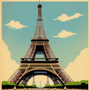
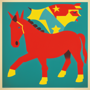
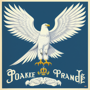
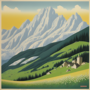
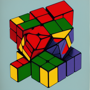
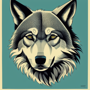
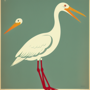
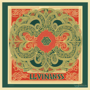
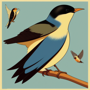
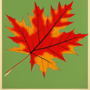
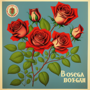
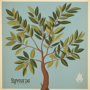
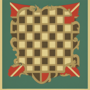
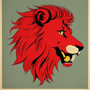
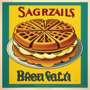
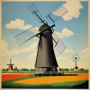
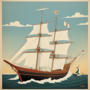
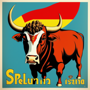
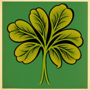
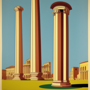
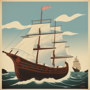
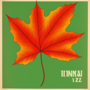
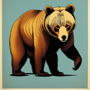
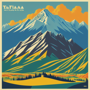

In [ ]:
image_dict = change_image_country_to_filename_map(country_to_filename_df_list[0], 1)
display_euro_map_for_image_dict(image_dict)

# Export data to GeoJSON

In [ ]:
import json
import base64
from PIL import Image
from io import BytesIO

def create_geojson(image_dict, geojson_export_name):
    img_zoom = 1
    img_width = 90 * img_zoom
    img_height = 90 * img_zoom

    # GeoJSON object
    geojson = {
        "type": "FeatureCollection",
        "features": []
    }

    # Load world map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Filter for Europe
    europe = world[world['continent'] == 'Europe']

    for country in europe.itertuples():
        country_name = country.name
        if country_name in image_dict:
            # Open image, resize and convert to base64
            img = Image.open(image_dict[country_name])
            img = img.resize((img_width, img_height))
            buffered = BytesIO()
            img.save(buffered, format="PNG")
            img_str = base64.b64encode(buffered.getvalue()).decode()

            # Create feature for each country with location and image
            feature = {
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": [
                        float(country.geometry.representative_point().x),
                        float(country.geometry.representative_point().y)
                    ]
                },
                "properties": {
                    "name": country_name,
                    "image": img_str
                }
            }
            geojson["features"].append(feature)

    # Write GeoJSON to file
    with open(f'{geojson_export_name}.geojson', 'w') as f:
        json.dump(geojson, f)


In [ ]:
export_path = "/content/drive/MyDrive/AI/deliberate_model/geojson_export/"

for i, curr_batch_name in enumerate(remaining_prompt_dirs):
  for batch_cpt in range(2):
    batchNum = batch_cpt
    image_dict = change_image_country_to_filename_map(country_to_filename_df_list[i], batch_cpt)
    create_geojson(image_dict, f'{export_path}{curr_batch_name}_batch_{batchNum}')

<ipython-input-37-42824997641f>:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-37-42824997641f>:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-37-42824997641f>:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-37-4282